Exercise 1. Sentiment Analysis


This exercise will allow you to use PyTorch. Refer to the DATA 690 Resources.
1. Import the required libraries.
2. Load the dataset containing a set of 1,000 product reviews from Amazon, which are
paired with a label of 0 (for negative reviews) or 1 (for positive reviews). Get the data at
https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences.
3. Separate the data into two variables: one containing the reviews and the other containing
the labels. Remove the punctuation from the reviews.
4. Create a variable containing the vocabulary of the entire set of reviews.
5. Additionally, create a dictionary that maps each word to an integer, where the words will
be the keys and the integers will be the values.
6. Encode the review data by replacing each word in a review for its paired integer.
7. Create a class containing the architecture of the network.
8. Make sure that you include an embedding layer. Initialize the model using 64 embedding
dimensions and 128 neurons for 3 LSTM layers.
9. Define the loss function, an optimization algorithm, and the number of epochs to train for.
For example, you can use binary cross-entropy loss as the loss function, the Adam
optimizer, and train for 10 epochs.
10. Create a for loop that goes through the different epochs and through every single
review individually. For each review, perform a prediction, calculate the loss function, and
update the parameters of the network. Additionally, calculate the accuracy of the network
over that training data.
11. Plot the progress of the loss function and accuracy over time.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import string
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import pandas as pd

df = pd.read_csv("/content/amazon_cells_labelled.txt", delimiter="\t", error_bad_lines=False)
df.head()



<ipython-input-24-365d5458814b>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("/content/amazon_cells_labelled.txt", delimiter="\t", error_bad_lines=False)


,So there is no way for me to plug it in here in the US unless I go by a converter.,0
0,"Good case, Excellent value.",1
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0


In [ ]:
df.columns

Index(['So there is no way for me to plug it in here in the US unless I go by a converter.', '0'], dtype='object')

In [ ]:
columns = ["Text", "Label"]
df = pd.read_csv("/content/amazon_cells_labelled.txt", delimiter="\t", names=columns)

df.head()


,Text,Label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [ ]:
df.shape

(1000, 2)

In [ ]:
import re
reviews = df["Text"]
labels = df["Label"]

def punctuationExclude(text):
    return re.sub(r'[^\w\s]', '', text)
reviews = reviews.apply(punctuationExclude)

print("Reviews:")
reviews.head()


Reviews:


0    So there is no way for me to plug it in here i...
1                            Good case Excellent value
2                                Great for the jawbone
3    Tied to charger for conversations lasting more...
4                                     The mic is great
Name: Text, dtype: object

In [ ]:
# Combining all the reviews into a single string
all_reviews= ' '.join(reviews)

words = all_reviews.split()
word_vocabulary = set(words)
word_vocabularyList = list(word_vocabulary)



In [ ]:
word_toIndex = {}
for idx, word in enumerate(word_vocabulary):
    word_toIndex[word] = idx


In [ ]:
encodedReviews = []

for review in reviews:
    encoded_review = [word_toIndex[word] for word in review.split()]
    encodedReviews.append(encoded_review)


In [ ]:
class SentimentClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers):
        super(SentimentClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.lstm(x)
        x = x[:, -1, :]
        x = self.fc(x)
        x = self.sigmoid(x)
        return x

In [ ]:
vocab_size = len(word_vocabulary)
embedding_dim = 64
hidden_dim = 128
num_layers = 3

model = SentimentClassifier(vocab_size, embedding_dim, hidden_dim, num_layers)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())
epochs = 10


In [ ]:
loss_arr= []
accuracy_arr = []

for epoch in range(epochs):
    running_loss = 0.0
    correct_predictions = 0
    total_samples = len(encodedReviews)

    for i in range(total_samples):
        review = torch.tensor(encodedReviews[i], dtype=torch.long)
        label = torch.tensor(labels[i], dtype=torch.float)

        optimizer.zero_grad()

        outputs = model(review.unsqueeze(0))
        loss = criterion(outputs.squeeze(), label)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        predicted_label = 1 if outputs.item() > 0.5 else 0
        correct_predictions += (predicted_label == label.item())

    epoch_loss = running_loss / total_samples
    accuracy = correct_predictions / total_samples
    loss_arr.append(epoch_loss)
    accuracy_arr.append(accuracy)

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.4f}")


Epoch 1/10, Loss: 0.6672, Accuracy: 0.6080
Epoch 2/10, Loss: 0.5538, Accuracy: 0.7340
Epoch 3/10, Loss: 0.3956, Accuracy: 0.8190
Epoch 4/10, Loss: 0.2284, Accuracy: 0.9150
Epoch 5/10, Loss: 0.1219, Accuracy: 0.9480
Epoch 6/10, Loss: 0.0444, Accuracy: 0.9890
Epoch 7/10, Loss: 0.0709, Accuracy: 0.9770
Epoch 8/10, Loss: 0.0294, Accuracy: 0.9910
Epoch 9/10, Loss: 0.0250, Accuracy: 0.9900
Epoch 10/10, Loss: 0.0191, Accuracy: 0.9940


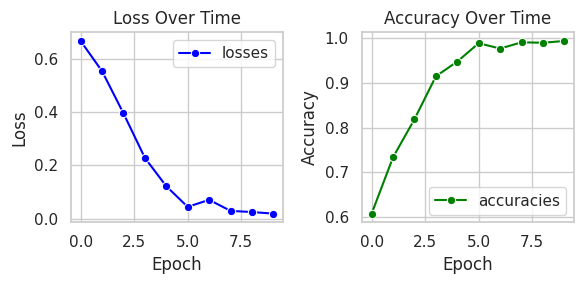

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
sns.lineplot(x=range(len(loss_arr)), y=loss_arr, marker='o', linestyle='-', color='blue', label='losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Time')
plt.legend()


plt.subplot(1, 2, 2)
sns.lineplot(x=range(len(accuracy_arr)), y=accuracy_arr, marker='o', linestyle='-', color='green', label='accuracies')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Time')
plt.legend()
plt.tight_layout()
plt.show()


Consider the following text:
sentence =


 “””The larger Broncos will be available with 35-inch off-road tires and will be able
to drive through water nearly 3 feet, 10 inches deep. It has independent front

DATA 690 2
suspension, unlike its main competitor, the Jeep Wrangler. Independent suspension, used
on almost all modern passenger vehicles, generally provides a smoother ride and better on -
road handling than a single solid axle. It still has a solid axle in the back though, like most
pickup trucks, a design suited to hard use. Like the Wrangler, both the two- and four-door
Bronco will have a removable roofs and doors. Buyers will be able to choose either a hard
roof that can be removed in sections, a cloth top, or both. Unlike the Wrangler, though, the
Bronco's doors will fit inside the vehicle after being removed. The Bronco will be available
with a choice of either a 10-speed automatic or seven-speed manual transmission. (The
manual transmission will have six gears for ordinary driving, plus a seventh for low speed
off-road driving.) It will be powered by either a 270- horsepower 2.3-liter turbocharged 4-
cylinder engine or a 310-horsepower 2.7-liter turbocharged V6. While all of the new Bronco
SUVs are designed for hard off-road use, the Bronco Sport isn't quite as hard-core in its
capabilities. It also has more convenience features than the more truck-like Bronco. While
it's based on engineering that's similar to car-like crossover SUVs, Ford says that it's still
intended for serious off-road use. Ford engineers boasted of the off-road testing the
prototypes have been put through, including driving through deep sand, up steep inclines ,
and crawling across boulder-strewn trails.”””


Perform the following task on the above sentences:
1. Replace special characters with empty spaces. You can use regex or any other method
2. Remove multiple empty spaces and replace them with a single space
3. Remove any single character
4. Convert the text to all lowercase
5. Split the text into individual words
6. Remove stopwords
7. Tokenize, stem, and lemmatize the text
6. What is the overall sentiment and subjectivity of the text

In [17]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [3]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk.stem import PorterStemmer

In [9]:
text = """The larger Broncos will be available with 35-inch off-road tires and will be able
to drive through water nearly 3 feet, 10 inches deep. It has independent front suspension, unlike its main competitor, the Jeep Wrangler. Independent suspension, used
on almost all modern passenger vehicles, generally provides a smoother ride and better on -
road handling than a single solid axle. It still has a solid axle in the back though, like most
pickup trucks, a design suited to hard use. Like the Wrangler, both the two- and four-door
Bronco will have a removable roofs and doors. Buyers will be able to choose either a hard
roof that can be removed in sections, a cloth top, or both. Unlike the Wrangler, though, the
Bronco's doors will fit inside the vehicle after being removed. The Bronco will be available
with a choice of either a 10-speed automatic or seven-speed manual transmission. (The
manual transmission will have six gears for ordinary driving, plus a seventh for low speed
off-road driving.) It will be powered by either a 270- horsepower 2.3-liter turbocharged 4-
cylinder engine or a 310-horsepower 2.7-liter turbocharged V6. While all of the new Bronco
SUVs are designed for hard off-road use, the Bronco Sport isn't quite as hard-core in its
capabilities. It also has more convenience features than the more truck-like Bronco. While
it's based on engineering that's similar to car-like crossover SUVs, Ford says that it's still
intended for serious off-road use. Ford engineers boasted of the off-road testing the
prototypes have been put through, including driving through deep sand, up steep inclines ,
and crawling across boulder-strewn trails."""
# Replacing special characters
cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)


In [10]:
# Removing extra spaces
cleaned_text = re.sub(r'\s+', ' ', cleaned_text)

# Removing single characters
cleaned_text = re.sub(r'\s[a-zA-Z]\s', ' ', cleaned_text)

# Converting the entire text to lower case
cleaned_text = cleaned_text.lower()

# Tokenizing the words
words_text = word_tokenize(cleaned_text)

# Removing stopwords
stop_words = set(stopwords.words('english'))
words_text = [word for word in words_text if word not in stop_words]

# Stemming and lemmatization to reduce words to their base or root form
word_stemmer = PorterStemmer()
word_lemmatizer = WordNetLemmatizer()
words = [word_lemmatizer.lemmatize(word_stemmer.stem(word)) for word in words_text]

print(words)

['larger', 'bronco', 'avail', '35', 'inch', 'road', 'tire', 'abl', 'drive', 'water', 'nearli', '3', 'foot', '10', 'inch', 'deep', 'independ', 'front', 'suspens', 'unlik', 'main', 'competitor', 'jeep', 'wrangler', 'independ', 'suspens', 'use', 'almost', 'modern', 'passeng', 'vehicl', 'gener', 'provid', 'smoother', 'ride', 'better', 'road', 'handl', 'singl', 'solid', 'axl', 'still', 'solid', 'axl', 'back', 'though', 'like', 'pickup', 'truck', 'design', 'suit', 'hard', 'use', 'like', 'wrangler', 'two', 'four', 'door', 'bronco', 'remov', 'roof', 'door', 'buyer', 'abl', 'choos', 'either', 'hard', 'roof', 'remov', 'section', 'cloth', 'top', 'unlik', 'wrangler', 'though', 'bronco', 'door', 'fit', 'insid', 'vehicl', 'remov', 'bronco', 'avail', 'choic', 'either', '10', 'speed', 'automat', 'seven', 'speed', 'manual', 'transmiss', 'manual', 'transmiss', 'six', 'gear', 'ordinari', 'drive', 'plu', 'seventh', 'low', 'speed', 'road', 'drive', 'power', 'either', '270', 'horsepow', '2', '3', 'liter', '

In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
sentiment_scores = analyzer.polarity_scores(text)

if sentiment_scores['compound'] > 0.05:
    sentiment_label = "Positive"
elif sentiment_scores['compound'] < -0.05:
    sentiment_label = "Negative"
else:
    sentiment_label = "Neutral"
print(f"Sentiment: {sentiment_label}")
print(f"Polarity: {polarity}")

Sentiment: Positive
Polarity: 0.12333123865381931


In [23]:
blob = TextBlob(text)
subjectivity = blob.sentiment.subjectivity
print(f"Subjectivity: {subjectivity}")

Subjectivity: 0.39980100544616676
